In [1]:
import numpy as np
import netCDF4
from netCDF4 import Dataset
import matplotlib.pyplot as plt

# Set image parameters for the notebook
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 400

plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

filename1 = './NC_files/EMULATOR_SCU_240x240x250_dx200_dz10_dt1s_12h_240_mod.2Dcom_1.nc'

nc_H = Dataset(filename1)
ZCT = nc_H.variables['ZCT'][:]
ZCB = nc_H.variables['ZCB'][:]
PREC = nc_H.variables['PREC'][:]
QCLOPD = nc_H.variables['QCLOPD'][:]
CWP = nc_H.variables['CWP'][:]

# Define cloud height
H = ZCT - ZCB # meters


In [2]:
from Centered_Mean import get_X_ave, save_tile_width_nc_file

In [3]:
TW = 8
PREC8 = get_X_ave(PREC,TW,CWP,0)
H8 = get_X_ave(H,TW,CWP,0)

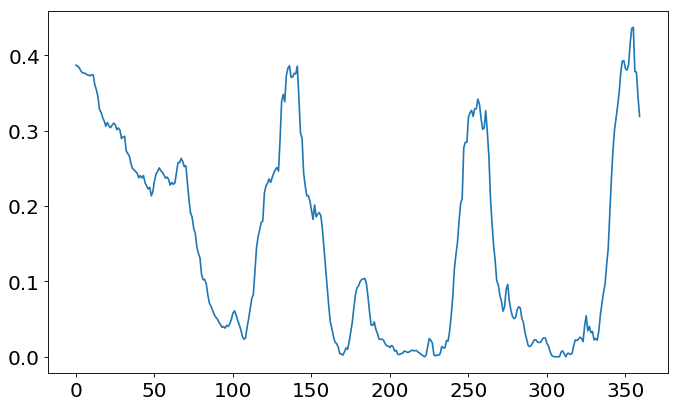

In [4]:
plt.plot(H8[:,6,12])
plt.show()

# Generate NC file for tiling field

In [5]:
save_tile_width_nc_file(X         = H,
                        file_name = './_del',
                        LES_nc    =nc_H,
                        threshold_parameter = CWP,
                        threshold_value     =0,
                        Powers = [3])#[0,1,2,3,4,5,6,7,8,9])

Creating tile width  8
